In [3]:
import sklearn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
df=pd.read_csv("homeprices.csv")
df

,area,prices
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


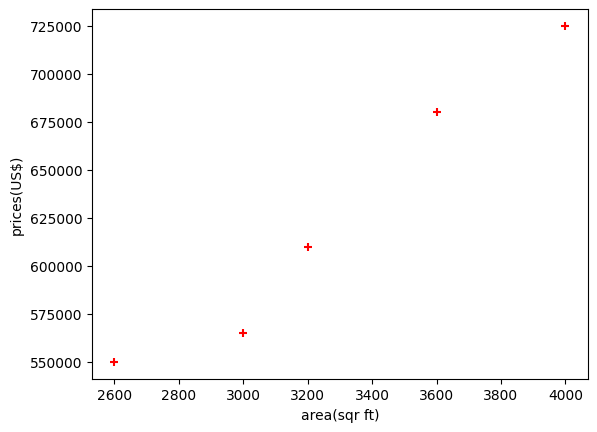

In [6]:
%matplotlib inline
plt.xlabel("area(sqr ft)")
plt.ylabel("prices(US$)")
plt.scatter(df.area,df.prices,color='red',marker='+')

In [7]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.prices)

LinearRegression()

In [8]:
reg.predict([[5000]])

C:\Users\DEEP HALDER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [9]:
reg.coef_

array([135.78767123])

In [10]:
reg.intercept_

180616.43835616432

In [36]:

135.78767123*5000+180616.43835616432

859554.7945061643

In [38]:
d=pd.read_csv("areas.csv")
d.head(3)

,area
0,1000
1,1500
2,2300


In [40]:
p=reg.predict(d)

In [41]:
d['prices']=p

In [42]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [45]:
d.to_csv('prediction.csv',index=False)

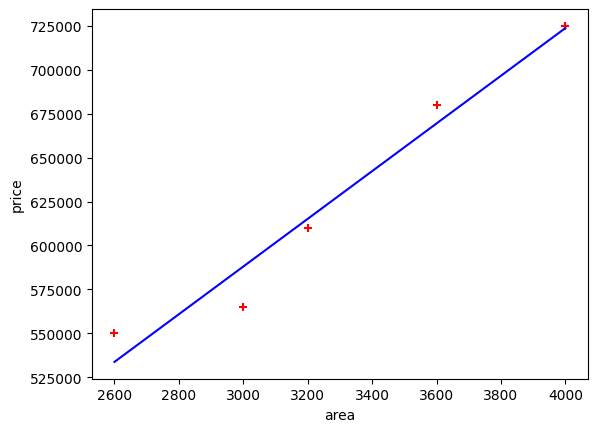

In [48]:
%matplotlib inline
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area,df.prices,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [17]:
#saving the trained model using pickel
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [19]:
#using the saved model to predict pricess
with open('model_pickle','rb') as f:
    mp=pickle.load(f)

In [20]:
mp.predict([[5000]])

C:\Users\DEEP HALDER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [22]:
#using sklearn joblib to save learn
#preferably used when you have a lot of numpy arrays
# from sklearn.externals import joblib
import joblib

In [24]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [27]:
mj=joblib.load('model_joblib')

In [28]:
mj.predict([[5000]])

C:\Users\DEEP HALDER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [29]:
mj.coef_

array([135.78767123])

In [30]:
mj.intercept_

180616.43835616432

In [14]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
     'Get rich quick! Make $10,000 a month from home!',
    'Your account has been compromised. Please click this link to reset your password.',
    'Hey, lets catch up over coffee this weekend!',
    'Your order has been successfully placed. Here is your order confirmation.'
]

In [18]:
import pickle
with open('model_spam_filter','rb') as f:
    mp=pickle.load(f)
    res=mp.predict(emails) 
for i in res:
 if res[i]==1:
    print(f'{emails[i]}------------------------------->spam')
 else:
    print(f'{emails[i]}-------------------------------->Ham')

Hey mohan, can we get together to watch footbal game tomorrow?-------------------------------->Ham
Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!------------------------------->spam
Hey mohan, can we get together to watch footbal game tomorrow?-------------------------------->Ham
Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!------------------------------->spam
Hey mohan, can we get together to watch footbal game tomorrow?-------------------------------->Ham
Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!------------------------------->spam
